<a href="https://colab.research.google.com/github/brunopazitto/TCC_PUC_MINAS/blob/main/TCC_PUCMINAS_BRUNO_PAZITO_DA_SILVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PUC Minas - Pontificia Universidade Católica de Minas Gerais**

Pós-Graduação em Ciência de Dados e Big Data

**TRABALHO DE CONCLUSÃO DE CURSO**

Análise preditiva - Machine Learning para tomada de decisão na evasão escolar

Bruno Pazito da Silva


In [ ]:
#Etapa destinada a importação das bibliotecas que serão utilizadas durante o desenvolvimento do projeto
#Bibliotecas para trabalharmos com DataFrame
import pandas as pd 
import numpy as np
import seaborn as sab
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn import metrics

In [ ]:
#aquisição dos dados
#Liberadndo o acesso aos arquivos no Gdrive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


#importação dos arquivos csv para as variáveis

In [ ]:
#Foi necessário utilizar um encondig para os dataset df1,df2,df3,df5 e df6 devido a caracteres especial que não está no padrão ASCII UTF-8 e low_memory pra evitar de especificar o tipo de dado da coluna
df1 = pd.read_csv('/content/gdrive/MyDrive/TCC/DataSets/ia_01.csv',sep=';',encoding="ISO-8859-1",low_memory=False)
df2 = pd.read_csv('/content/gdrive/MyDrive/TCC/DataSets/ia_04.csv',sep=';',encoding="ISO-8859-1",low_memory=False)
df3 = pd.read_csv('/content/gdrive/MyDrive/TCC/DataSets/ia_06.csv',sep=';',encoding="ISO-8859-1",low_memory=False)
df4 = pd.read_csv('/content/gdrive/MyDrive/TCC/DataSets/ia_07.csv',sep=';',low_memory=False)
df5 = pd.read_csv('/content/gdrive/MyDrive/TCC/DataSets/ia_08.csv',sep=';',encoding="ISO-8859-1",low_memory=False)
df6 = pd.read_csv('/content/gdrive/MyDrive/TCC/DataSets/ia_09.csv',sep=';',encoding="ISO-8859-1")

In [ ]:
#Visualizando quantidade de resgistro em cada DS
print('Quandidate de linhas e colunas do DF1 - ia_01.csv', df1.shape)
print('Quandidate de linhas e colunas do DF2 - ia_04.csv', df2.shape)
print('Quandidate de linhas e colunas do DF3 - ia_06.csv', df3.shape)
print('Quandidate de linhas e colunas do DF4 - ia_07.csv', df4.shape)
print('Quandidate de linhas e colunas do DF5 - ia_08.csv', df5.shape)
print('Quandidate de linhas e colunas do DF6 - ia_09.csv', df6.shapeu)

Quandidate de linhas e colunas do DF1 - ia_01.csv (11754, 15)
Quandidate de linhas e colunas do DF2 - ia_04.csv (22323, 9)
Quandidate de linhas e colunas do DF3 - ia_06.csv (147910, 9)
Quandidate de linhas e colunas do DF4 - ia_07.csv (24138, 4)
Quandidate de linhas e colunas do DF5 - ia_08.csv (396543, 7)
Quandidate de linhas e colunas do DF6 - ia_09.csv (212946, 5)


#ETAPA DE TRATAMENTO DOS DADOS
Nesta etapa irei realizar o tratamento dos DS individualmente, onde irei remover as colunas que não serão utilizadas e as conversões para cada tipo de dados

In [ ]:
#Renomenando o identificador da coluna RA no DF2 pois o pandas não reconheceu o nome da coluna.
df2.rename(columns={'ï»¿ID_ALUNO':'ID_ALUNO'}, inplace = True)

In [ ]:
#Realizando a exclusão das colunas que não serão utilizadas no projeto.
df1.drop(columns=['CEP','PONTOSVESTIBULAR','DTNASCIMENTO'],inplace=True)
df4.drop(columns=['ABERTURA','FECHAMENTO'],inplace=True)
df5.drop(columns=['datahora','status','pesquisa','assunto','subassunto'],inplace=True)
df6.drop(columns=['CODIGO','TIPO'],inplace=True)
#coluna criada para ser realizada o agrupamento dos valores atráves do RA.
df6['CORRIGE'] = df6['ID_ALUNO']

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147910 entries, 0 to 147909
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID_ALUNO    147910 non-null  int64  
 1   ID_CURSO    147910 non-null  int64  
 2   PERIODO     147910 non-null  object 
 3   DISCIPLINA  147910 non-null  object 
 4   STATUS      147910 non-null  object 
 5   SEMESTRE    147910 non-null  object 
 6   NOTA        147910 non-null  float64
 7   CH          147910 non-null  int64  
 8   CODIGO      147910 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 10.2+ MB


In [ ]:
#Nesta etapa de manipulação dos dados foi realizado, agrupamentos de colunas, exclusão e renomeação.
df1['ESTADO_CIVIL'].fillna('Não informado', inplace=True)
df3_0 = df3.groupby(['ID_ALUNO','ID_CURSO','SEMESTRE']) ['CH'].sum().reset_index()
df3_1 = df3.groupby(['ID_ALUNO','ID_CURSO','SEMESTRE']) ['NOTA'].mean().reset_index()
df3 = pd.merge(df3_0,df3_1,how='left',left_on=['ID_ALUNO','ID_CURSO','SEMESTRE'],right_on=['ID_ALUNO','ID_CURSO','SEMESTRE'])
df3.rename(columns={'NOTA':'MEDIA_NOTA'}, inplace = True)
df4.rename(columns={'CODATENDIMENTO':'QTD_ATENDIMENTOS'}, inplace = True)
df4 = df4.groupby(['ID_ALUNO']) ['QTD_ATENDIMENTOS'].count().reset_index()
df5.rename(columns={'duracao':'DURACAO_TOTAL'}, inplace = True)
df5 = df5.groupby(['CODIGO']) ['DURACAO_TOTAL'].sum().reset_index()
df6 = df6.groupby(['ID_ALUNO','ID_CURSO','SEMESTRE']) ['CORRIGE'].count().reset_index()
df6.drop(columns=['CORRIGE'],inplace=True)

In [ ]:
#unificando todos os dataframes
mdf1 = pd.merge(df1,df2,how='left',left_on=['ID_ALUNO','ID_CURSO','ULTIMO_SEMESTRE'],right_on=['ID_ALUNO','ID_CURSO','SEMESTRE'])
mdf2 = pd.merge(mdf1,df3,how='left',on=['ID_ALUNO','ID_CURSO','SEMESTRE'])
mdf3 = pd.merge(mdf2,df4,how='left',on=['ID_ALUNO'])
mdf4 = pd.merge(mdf3,df5,how='left',on=['CODIGO'])
md = pd.merge(mdf4,df6,how='left',on=['ID_ALUNO','ID_CURSO','SEMESTRE'])

In [ ]:
md.describe()

,ID_ALUNO,ID_CURSO,CODIGO,CR,IDADE,DIAS SEM ACESSO PLATAFORMA,TOTAL_ESTUDOS_ORIENTADOS_ANEXADO,TOTAL_MENSGAGENS_CONTATOS_GERAL_PLATAFORMA,TOTAL_PARTICIPACAO_FORUM_AVALIATIVO,TOTAL_PARTICIPACAO_FORUM_FALE_TUTOR,TOTAL_TENTATIVAS_QUIZ,CH,MEDIA_NOTA,QTD_ATENDIMENTOS,DURACAO_TOTAL
count,1.175400e+04,11754.00000,11754.000000,11754.000000,11754.000000,7546.000000,7671.000000,7671.000000,7671.000000,7671.000000,7671.000000,6481.000000,6481.000000,8154.000000,6516.000000
mean,1.920352e+06,580.74715,301911.133486,3.570317,30.799217,39.490459,1.797549,4.328249,1.967801,0.361622,12.555338,372.002777,7.141318,2.543782,1779.588244
std,1.105032e+05,186.71798,104269.804830,3.899339,9.000034,46.778439,1.739809,54.823992,2.134922,1.369764,9.357371,245.637180,2.910285,3.109453,3131.368874
min,8.100660e+05,283.00000,113.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,-17.000000
25%,1.828598e+06,447.00000,308161.250000,0.000000,23.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3.500000,260.000000,6.250000,1.000000,181.000000
50%,1.921899e+06,546.00000,342868.000000,0.880000,29.000000,17.000000,2.000000,0.000000,2.000000,0.000000,14.000000,320.000000,8.214286,2.000000,712.500000
75%,2.017388e+06,699.00000,373454.500000,7.920000,36.000000,62.000000,3.000000,0.000000,3.000000,0.000000,19.000000,420.000000,9.200000,3.000000,2019.250000
max,2.119301e+06,960.00000,397278.000000,10.000000,76.000000,150.000000,23.000000,3261.000000,24.000000,28.000000,130.000000,2620.000000,10.000000,66.000000,71280.000000


In [ ]:
#realizando a exclusão da coluna semestre
md.drop(columns=['SEMESTRE'],inplace=True)

In [ ]:
#Convertendo as colunas para os tipos de dados correto
md['DIAS SEM ACESSO PLATAFORMA'] = md['DIAS SEM ACESSO PLATAFORMA'].values.astype(np.int16)
md['TOTAL_ESTUDOS_ORIENTADOS_ANEXADO'] = md['TOTAL_ESTUDOS_ORIENTADOS_ANEXADO'].values.astype(np.int16)
md['TOTAL_MENSGAGENS_CONTATOS_GERAL_PLATAFORMA'] = md['TOTAL_MENSGAGENS_CONTATOS_GERAL_PLATAFORMA'].values.astype(np.int16)
md['TOTAL_PARTICIPACAO_FORUM_AVALIATIVO'] = md['TOTAL_PARTICIPACAO_FORUM_AVALIATIVO'].values.astype(np.int16)
md['TOTAL_PARTICIPACAO_FORUM_FALE_TUTOR'] = md['TOTAL_PARTICIPACAO_FORUM_FALE_TUTOR'].values.astype(np.int16)
md['TOTAL_TENTATIVAS_QUIZ'] = md['TOTAL_TENTATIVAS_QUIZ'].values.astype(np.int16)
md['CH'] = md['CH'].values.astype(np.int16)
md['QTD_ATENDIMENTOS'] = md['QTD_ATENDIMENTOS'].values.astype(np.int16)
md['MEDIA_NOTA'] = md['MEDIA_NOTA'].values.astype(np.float16)
md['DURACAO_TOTAL'] = md['DURACAO_TOTAL'].values.astype(np.int16)
md.loc[md.MEDIA_NOTA.isna(),'MEDIA_NOTA'] = md.MEDIA_NOTA.mean()
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11754 entries, 0 to 11753
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ID_ALUNO                                    11754 non-null  int64  
 1   ID_CURSO                                    11754 non-null  int64  
 2   CURSO                                       11754 non-null  object 
 3   ULTIMO_SEMESTRE                             11754 non-null  object 
 4   PRIMEIRO_SEMESTRE                           11754 non-null  object 
 5   TIPO_INGRESSO                               11754 non-null  object 
 6   CODIGO                                      11754 non-null  int64  
 7   CR                                          11754 non-null  float64
 8   ESTADO_CIVIL                                11754 non-null  object 
 9   SITUACAO_PERLET                             11754 non-null  object 
 10  IDADE     

In [ ]:
#Antes de realizar a conversão para valores numéricos
md.SITUACAO_PERLET.unique()

array(['Matriculado', 'Abandono de Curso', 'Desistente',
       'Calouro Desistente', 'Transferência Externa', 'Trancado',
       'Falecido'], dtype=object)

In [ ]:
#Convertendo valores categóricos para numéricos
"""md['ULTIMO_SEMESTRE'].replace(
    to_replace=['2017/2','2018/1', '2018/2', '2019/1', '2019/2', '2020/1'],
    value=0,
    inplace=True
)
md['ULTIMO_SEMESTRE'].replace(
    to_replace=['2020/2'],
    value=1,
    inplace=True
)"""
md['SITUACAO_PERLET'].replace(
    to_replace=['Abandono de Curso', 'Desistente',
       'Calouro Desistente','Transferência Externa',
       'Trancado', 'Falecido'],
    value=1,
    inplace=True
)
md['SITUACAO_PERLET'].replace(
    to_replace=['Matriculado'],
    value=0,
    inplace=True
)

In [ ]:
#Convertendo o tipo de dados das variáveis que foram transformadas para numéricas
md['SITUACAO_PERLET'] = md['SITUACAO_PERLET'].values.astype(np.int16)
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11754 entries, 0 to 11753
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ID_ALUNO                                    11754 non-null  int64  
 1   ID_CURSO                                    11754 non-null  int64  
 2   CURSO                                       11754 non-null  object 
 3   ULTIMO_SEMESTRE                             11754 non-null  object 
 4   PRIMEIRO_SEMESTRE                           11754 non-null  object 
 5   TIPO_INGRESSO                               11754 non-null  object 
 6   CODIGO                                      11754 non-null  int64  
 7   CR                                          11754 non-null  float64
 8   ESTADO_CIVIL                                11754 non-null  object 
 9   SITUACAO_PERLET                             11754 non-null  int16  
 10  IDADE     

In [ ]:
#Antes conversões
md.TIPO_INGRESSO.unique()

array(['Novo Curso Superior', 'Processo Seletivo', 'Histórico',
       'Transferência', 'Reingresso', 'ENEM', 'Prouni', 'Aluno Especial',
       'Encceja', 'Não informado', 'Reabertura de Matrícula',
       'Nossa Bolsa'], dtype=object)

In [ ]:
#Atribuindo valores númericos para as formas de ingresso
class_TIPO_INGRESSO = {
    'Novo Curso Superior': 0,
    'Processo Seletivo': 1,
    'Histórico': 2,
    'Transferência': 3,
    'Reingresso': 4,
    'ENEM': 5,
    'Prouni': 6,
    'Aluno Especial': 7,
    'Encceja': 8,
    'Não informado': 9,
    'Reabertura de Matrícula': 10,
    'Nossa Bolsa': 11,   
}
#mapeamento de colunas da(s) classe(s)
md['TIPO_INGRESSO'] = md['TIPO_INGRESSO'].map(class_TIPO_INGRESSO)

In [ ]:
#Após conversões
md.TIPO_INGRESSO.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
#Antes conversções
md.ESTADO_CIVIL.unique()

array(['Casado', 'Solteiro', 'Divorciado', 'Não informado', 'Desquitado',
       'Outros', 'União Estável', 'Separado', 'Viúvo'], dtype=object)

In [ ]:
#Atribuindo valores númericos para o Estado Civil
class_ESTADO_CIVIL = {
    'Casado': 0,
    'Solteiro': 1,
    'Divorciado': 2,
    'Não informado': 3,
    'Desquitado': 4,
    'Outros': 5,
    'União Estável': 6,
    'Separado': 7,
    'Viúvo': 8,  
}
#mapeamento de colunas da(s) classe(s)
md['ESTADO_CIVIL'] = md['ESTADO_CIVIL'].map(class_ESTADO_CIVIL)

In [ ]:
#Após conversões
md.ESTADO_CIVIL.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
#Antes conversções
md.SEXO.unique()

array(['F', 'M', 'N'], dtype=object)

In [ ]:
#Atribuindo valores númericos para a variável SEXO
class_SEXO = {
    'F': 0,
    'M': 1,
    'N': 2
}
md['SEXO'] = md['SEXO'].map(class_SEXO)

In [ ]:
#Após conversões
md.SEXO.unique()

array([0, 1, 2])

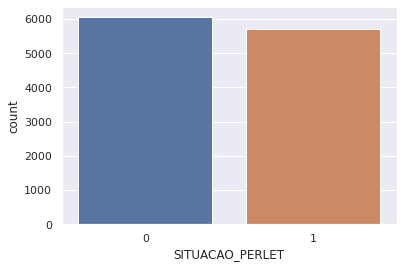

In [ ]:
# Verificando a distribuição dos dados da variável Target (Preditora)
sab.set_theme(style="darkgrid")
ax = sab.countplot(x="SITUACAO_PERLET",data=md)

In [ ]:
print('Quandidate de linhas e colunas do DF1 - ia_01.csv', md.shape)

Quandidate de linhas e colunas do DF1 - ia_01.csv (11754, 22)


In [ ]:
#Realziando uma cópia do dataset original
md_copy = md.copy()

In [ ]:
#Realizando a separação dos atributos que serão utizidados no modelo
x = md[['TIPO_INGRESSO','CR','ESTADO_CIVIL','IDADE','DIAS SEM ACESSO PLATAFORMA','TOTAL_ESTUDOS_ORIENTADOS_ANEXADO','TOTAL_MENSGAGENS_CONTATOS_GERAL_PLATAFORMA','TOTAL_PARTICIPACAO_FORUM_AVALIATIVO','TOTAL_PARTICIPACAO_FORUM_FALE_TUTOR','TOTAL_TENTATIVAS_QUIZ','MEDIA_NOTA','QTD_ATENDIMENTOS','DURACAO_TOTAL','SEXO']]
y = md['SITUACAO_PERLET']

In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: SITUACAO_PERLET, dtype: int16

In [ ]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11754 entries, 0 to 11753
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ID_ALUNO                                    11754 non-null  int64  
 1   ID_CURSO                                    11754 non-null  int64  
 2   CURSO                                       11754 non-null  object 
 3   ULTIMO_SEMESTRE                             11754 non-null  object 
 4   PRIMEIRO_SEMESTRE                           11754 non-null  object 
 5   TIPO_INGRESSO                               11754 non-null  int64  
 6   CODIGO                                      11754 non-null  int64  
 7   CR                                          11754 non-null  float64
 8   ESTADO_CIVIL                                11754 non-null  int64  
 9   SITUACAO_PERLET                             11754 non-null  int16  
 10  IDADE     

ETAPA DE ANÁLISE EXPLORATÓRIA DOS DADOS

In [ ]:
#Quantidade de alunos por semestre
QTD_REGISTROS = md.groupby(['ULTIMO_SEMESTRE'])['SITUACAO_PERLET'].count().reset_index()
QTD_REGISTROS.rename(columns={"SITUACAO_PERLET":"QUANTIDADE"},inplace=True)

In [ ]:
#Quantidade de alunos por semestre
QTD_REGISTROS.head(10)

,ULTIMO_SEMESTRE,QUANTIDADE
0,2017/2,42
1,2018/1,404
2,2018/2,423
3,2019/1,827
4,2019/2,828
5,2020/1,1512
6,2020/2,7718


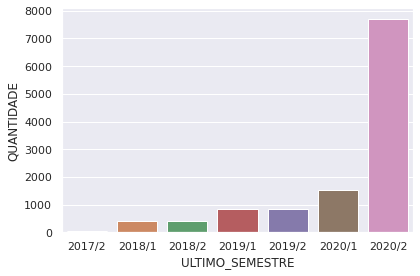

In [ ]:
#Plotando o gráfico com a quantidade de alunos por semestre
fig, ax = plt.subplots()
#criando o gráfico de barras 
sab.barplot(x="ULTIMO_SEMESTRE",y='QUANTIDADE', ax=ax, data=QTD_REGISTROS)
#otimizar espaço da figure
fig.tight_layout();

In [ ]:
#Quantidade de evadidos por semestre
QTD_EVADIDO = md.groupby(['ULTIMO_SEMESTRE'])['SITUACAO_PERLET'].sum().reset_index()
QTD_EVADIDO.rename(columns={"SITUACAO_PERLET":"QUANTIDADE"},inplace=True)

In [ ]:
#Quantidade de evadidos por semestre
QTD_EVADIDO.head(10)

,ULTIMO_SEMESTRE,QUANTIDADE
0,2017/2,42
1,2018/1,404
2,2018/2,423
3,2019/1,827
4,2019/2,828
5,2020/1,1512
6,2020/2,1663


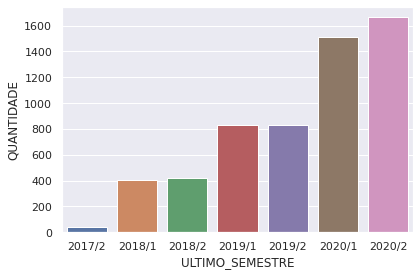

In [ ]:
#Exemplo 4: Desenhando um gráfico de duas barras:
#criando uma figure, axes
fig, ax = plt.subplots()
#criando o gráfico de barras 
sab.barplot(x="ULTIMO_SEMESTRE",y='QUANTIDADE', ax=ax, data=QTD_EVADIDO)
#otimizar espaço da figure
fig.tight_layout();

In [ ]:
#Quantidade de evadidos por curso
QTD_EVAD_CURSO = md.groupby(['CURSO'])['SITUACAO_PERLET'].sum().reset_index()
QTD_EVAD_CURSO.rename(columns={"SITUACAO_PERLET":"QUANTIDADE"},inplace=True)

In [ ]:
#Quantidade de evadidos por CURSO
QTD_EVAD_CURSO.head(30)

,CURSO,QUANTIDADE
0,Administração,1143
1,Agronomia,55
2,Análise e Desenvolvimento de Sistemas,483
3,Ciências Biológicas,179
4,Ciências Contábeis,594
5,Educação Física (Bacharelado),44
6,Educação Física (Licenciatura),95
7,Engenharia Civil,23
8,Engenharia de Produção,142
9,Formação de Docentes para a Educação Básica,77


In [ ]:
#Quantidade de evadidos por SEXO
QTD_EVAD_SEXO = md.groupby(['SEXO'])['SITUACAO_PERLET'].sum().reset_index()
QTD_EVAD_SEXO.rename(columns={"SITUACAO_PERLET":"QUANTIDADE"},inplace=True)

In [ ]:
#Quantidade de evadidos por SEXO
QTD_EVAD_SEXO.head(10)

,SEXO,QUANTIDADE
0,0,3421
1,1,2252
2,2,26


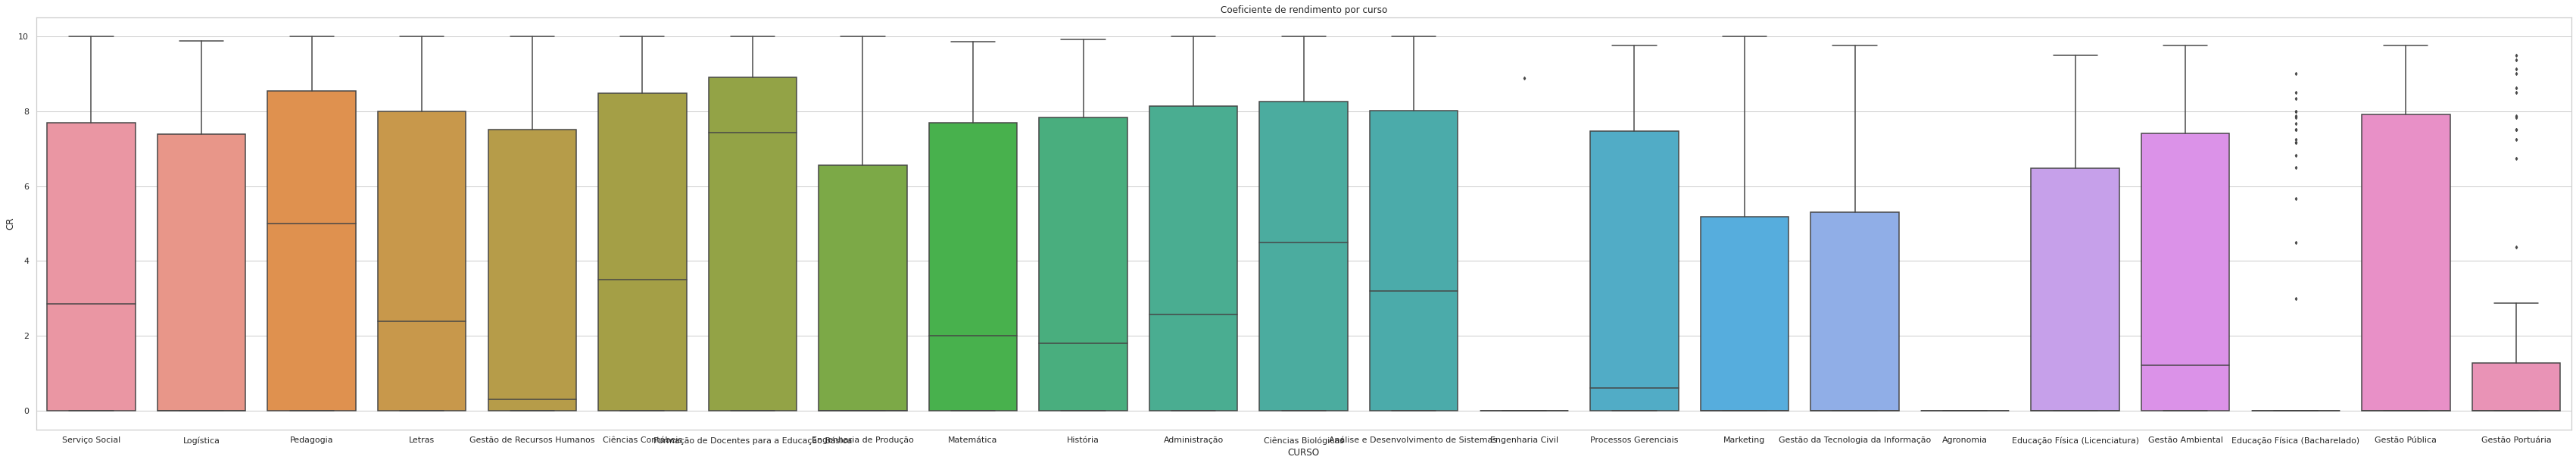

In [ ]:
#Plotando Boxplot para verificar o CR por Curso
sab.set(style='whitegrid')
plt.figure(figsize=(60,10))
plt.title('Coeficiente de rendimento por curso')
bx = sab.boxplot(x=md['CURSO'],y=md['CR'], orient='v', fliersize=3, whis=1.5)

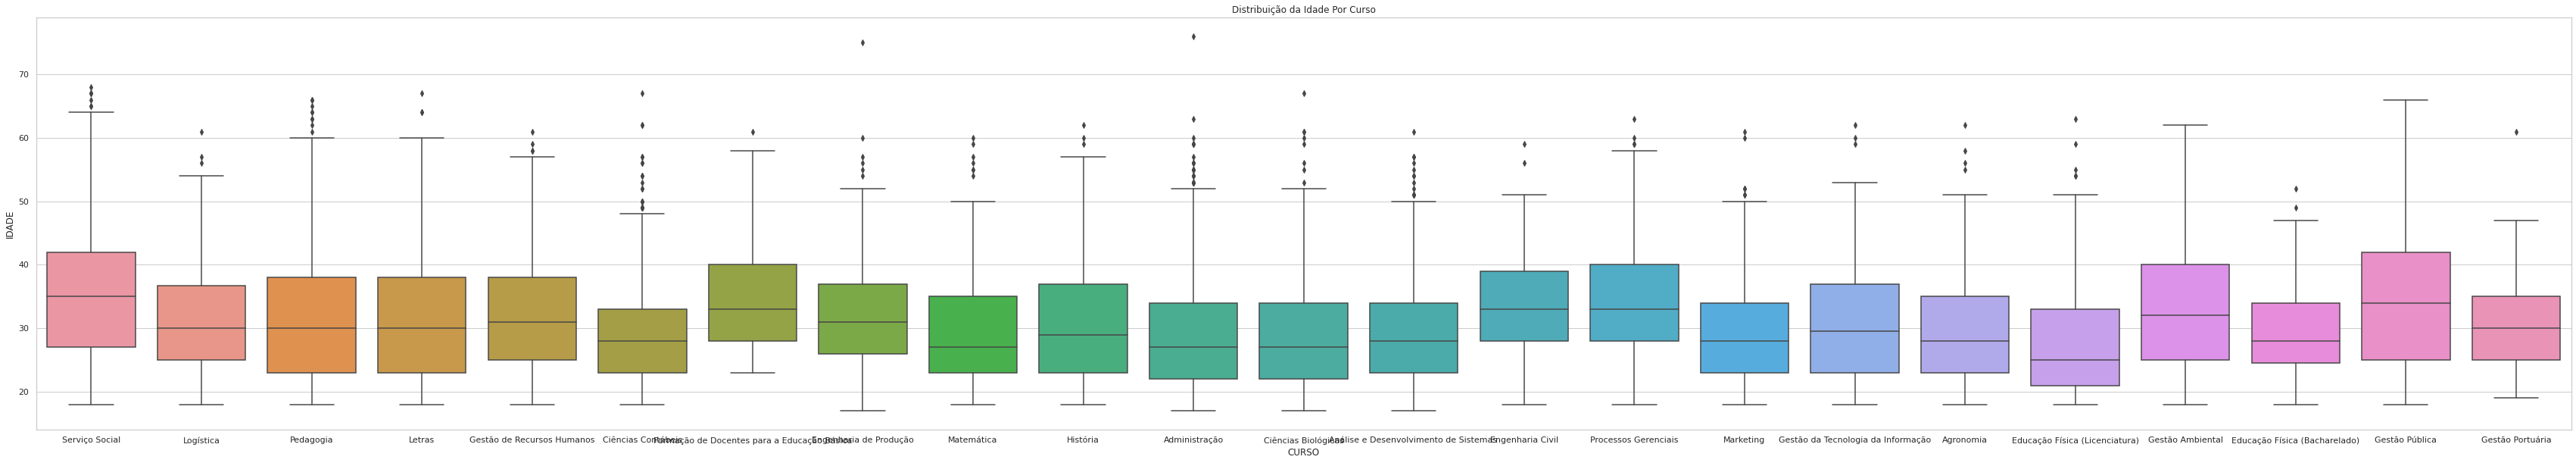

In [ ]:
#Plotando BoxPlot da idade dos alunos por curso
#1Q - 25% 2Q - 50% 3Q -75% 
sab.set(style='whitegrid')
plt.figure(figsize=(60,10))
plt.title('Distribuição da Idade Por Curso')
bx = sab.boxplot(x=md['CURSO'],y=md['IDADE'], orient='v', fliersize=5, whis=1.5)

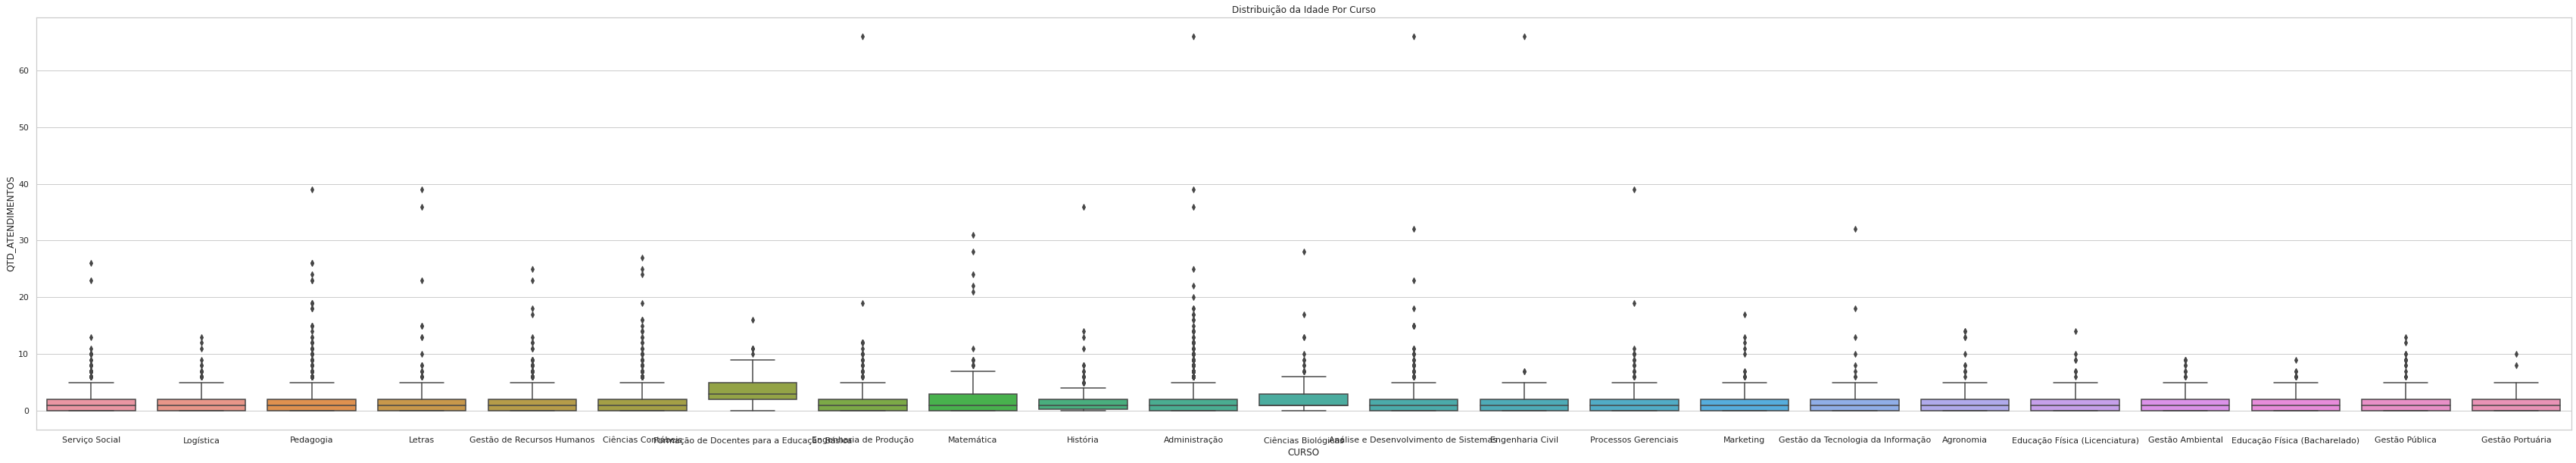

In [ ]:
#Plotante boxplot quantidade de atendimentos por curso
#1Q - 25% 2Q - 50% 3Q -75% 
sab.set(style='whitegrid')
plt.figure(figsize=(60,10))
plt.title('Distribuição quantidade de atendimentos abertos por aluno')
bx = sab.boxplot(x=md['CURSO'],y=md['QTD_ATENDIMENTOS'], orient='v', fliersize=5, whis=1.5)

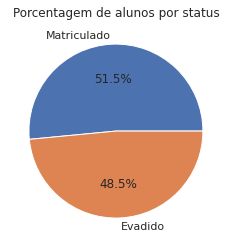

In [ ]:
#Percentual de alunos matriculados e evadidos
status = md.SITUACAO_PERLET.value_counts(normalize=True)
rotulo = ['Matriculado', 'Evadido']
plt.pie(status, labels = rotulo, autopct='%1.1f%%')
plt.title('Porcentagem de alunos por status')
plt.show()

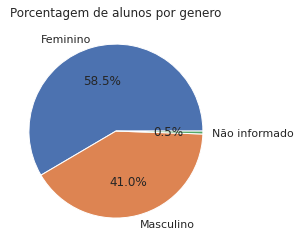

In [ ]:
#Percentual de alunos por genero
porcentagemSexo = md.SEXO.value_counts(normalize=True)
rotulo = ['Feminino', 'Masculino', 'Não informado']
plt.pie(porcentagemSexo, labels = rotulo, autopct='%1.1f%%')
plt.title('Porcentagem de alunos por genero')
plt.show()
#md.SEXO.value_counts().plot(kind='pie', autopct='%.2f%%')
#plt.axis('equal')  # Para deixar o gráfico redondo

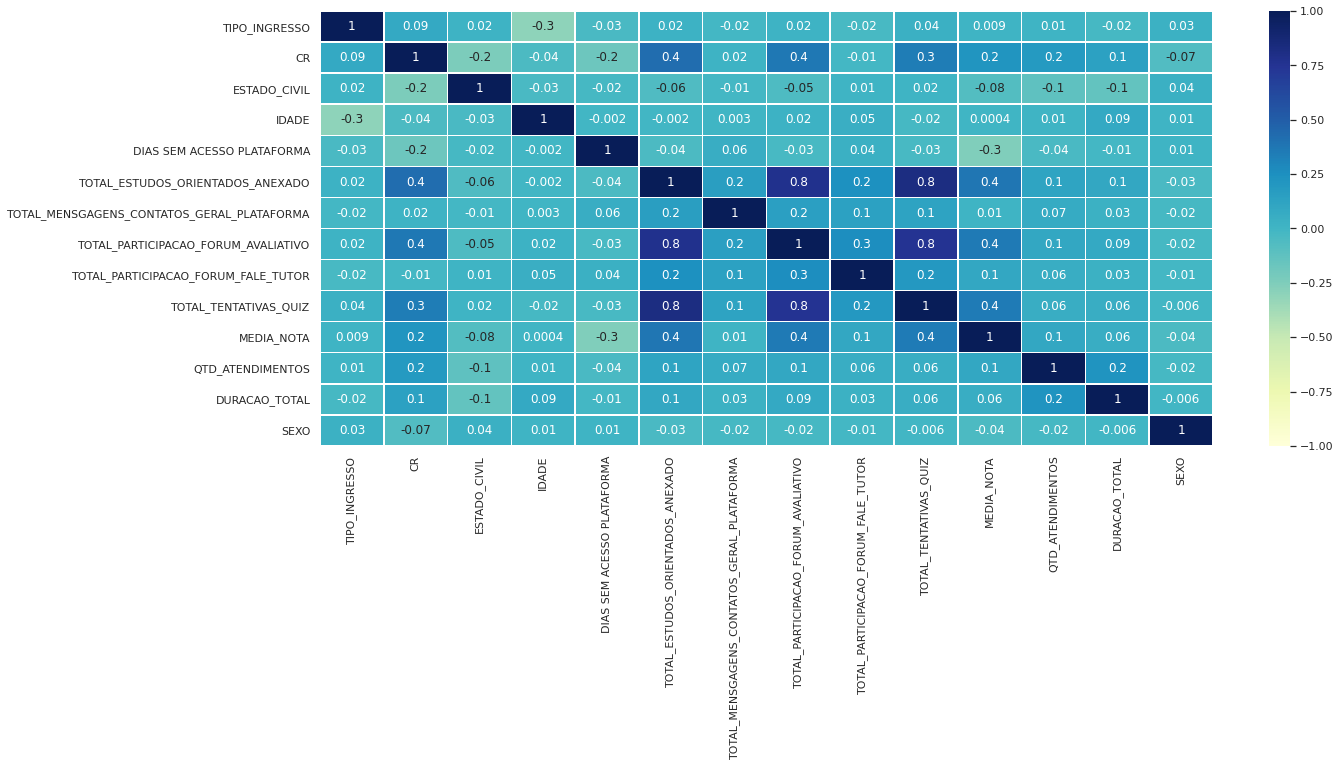

In [ ]:
#Verificando a corelação entre os atríbutos independentes que foram utilizado no modelo
correlacao = x.corr()
plt.figure(figsize=(20,8))
sab.heatmap(correlacao, linewidths=0.5, vmin=-1, vmax=1, annot=True, cmap='YlGnBu', fmt='.1g')
plt.show()

#ETAPA DESTINADA AO TREINAMENTO, ESCOLHA DO MOLDELO DE MACHINE LEARNING E AVALIAÇÃO DOS MODELOS

In [ ]:
#Inicio treinamento e criação de modelos
#Variavel x recebe os atributos explicativos para predição já a variável Y recebe o atributo target(alvo) 
X_train, x_teste, Y_train, y_teste = train_test_split(x, y, test_size = 0.4, random_state = 42,stratify=y)

In [ ]:
X_train.shape, Y_train.shape

((7052, 14), (7052,))

In [ ]:
tamanho_validar = int(x_teste.shape[0]*0.4)
tamanho_validar,x_teste.shape[0]

(1880, 4702)

In [ ]:
x_validar = x_teste[:tamanho_validar]
x_teste = x_teste[tamanho_validar:]
y_validar = y_teste[:tamanho_validar]
y_teste = y_teste[tamanho_validar:]
x_teste.shape, x_validar.shape, y_teste.shape, y_validar.shape

((2822, 14), (1880, 14), (2822,), (1880,))

In [ ]:
#Verificando tamanho das variáveis após a divisão entre treino e teste
X_train.shape,Y_train.shape

((7052, 14), (7052,))

In [ ]:
#Criando Baseline para comparação do modelo
baseline_pred = np.random.choice([0,1], size = len(y_teste))
print(baseline_pred)

[0 1 1 ... 1 0 0]


In [ ]:
#Avaliando o Baseline
print('Matriz de Confusão\n', metrics.confusion_matrix(y_teste,baseline_pred))
print('\nAcurácia\n', metrics.accuracy_score(y_teste, baseline_pred))
print('\nAcurácia Balanceada por Classe\n', metrics.balanced_accuracy_score(y_teste, baseline_pred))
print('\nPrecision\n', metrics.precision_score(y_teste, baseline_pred))
print('\nRecall\n', metrics.recall_score(y_teste, baseline_pred))
print('\nF1\n', metrics.f1_score(y_teste, baseline_pred))
print('\nAUCROC\n', metrics.roc_auc_score(y_teste, baseline_pred))
print('\nClassification Report\n', metrics.classification_report(y_teste, baseline_pred))

Matriz de Confusão
 [[743 722]
 [696 661]]

Acurácia
 0.49751948972360027

Acurácia Balanceada por Classe
 0.497135570584581

Precision
 0.4779464931308749

Recall
 0.4871039056742815

F1
 0.48248175182481756

AUCROC
 0.4971355705845811

Classification Report
               precision    recall  f1-score   support

           0       0.52      0.51      0.51      1465
           1       0.48      0.49      0.48      1357

    accuracy                           0.50      2822
   macro avg       0.50      0.50      0.50      2822
weighted avg       0.50      0.50      0.50      2822



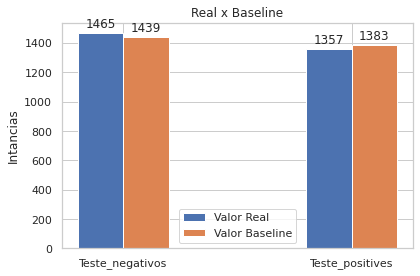

In [ ]:
#Criando labels e os valores armazenados nas barras
labels = ['Teste_negativos', 'Teste_positives']
count_test = [(y_teste == 0).sum(), (y_teste == 1).sum()]
count_baseline = [(baseline_pred == 0).sum(), (baseline_pred == 1).sum()]

#Criando as barras
b = np.arange(len(labels))
width = 0.2 #largura da barra

#Criando os plots
fig, ax = plt.subplots()
bar1 = ax.bar(b - width/2, count_test, width, label='Valor Real')
bar2 = ax.bar(b + width/2, count_baseline, width, label='Valor Baseline')

#dando nome ao gráfico 
ax.set_ylabel('Intancias')
ax.set_title('Real x Baseline')
ax.set_xticks(b)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
          xy=(rect.get_x() + rect.get_width() /2, height),
          xytext=(0,3),
          textcoords='offset points',
          ha='center', va='bottom')
      
#Plotando o grafico de barras
autolabel(bar1)
autolabel(bar2)
fig.tight_layout()

plt.show()
                  


In [ ]:
clasificador_svm = SVC(gamma='auto',kernel='rbf',random_state=1,probability=True)
clasificador_svm.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#Prevendo os valores com o modelo
pred = clasificador_svm.predict(x_teste)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [ ]:
print('Matriz de Confusão\n', metrics.confusion_matrix(y_teste,pred))
print('\nAcurácia\n', metrics.accuracy_score(y_teste, pred))
print('\nAcurácia Balanceada por Classe\n', metrics.balanced_accuracy_score(y_teste, pred))
print('\nPrecision\n', metrics.precision_score(y_teste, pred))
print('\nRecall\n', metrics.recall_score(y_teste, pred))
print('\nF1\n', metrics.f1_score(y_teste, pred))
print('\nAUCROC\n', metrics.roc_auc_score(y_teste, pred))
print('\nClassification Report\n', metrics.classification_report(y_teste,pred))

Matriz de Confusão
 [[1431   34]
 [ 672  685]]

Acurácia
 0.7498228206945429

Acurácia Balanceada por Classe
 0.7407908933830649

Precision
 0.952712100139082

Recall
 0.5047899778924098

F1
 0.6599229287090559

AUCROC
 0.740790893383065

Classification Report
               precision    recall  f1-score   support

           0       0.68      0.98      0.80      1465
           1       0.95      0.50      0.66      1357

    accuracy                           0.75      2822
   macro avg       0.82      0.74      0.73      2822
weighted avg       0.81      0.75      0.73      2822



In [ ]:
clasificador_svm.score(x_teste, y_teste)

0.7498228206945429

In [ ]:
clasificador_svm.score(X_train, Y_train)

0.996596710153148

Text(0.5, 12.5, 'Predicted label')

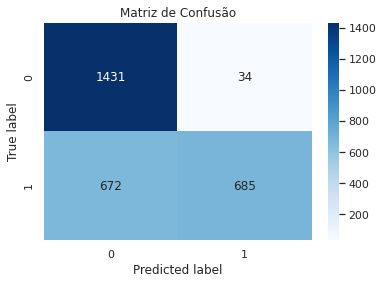

In [ ]:
#Gerando matriz de confusão do modelo SVM com o Seaborn para melhor visualização e entendimento
cm = confusion_matrix(y_teste, pred)

sab.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusão')
plt.ylabel('True label')
plt.xlabel('Predicted label')

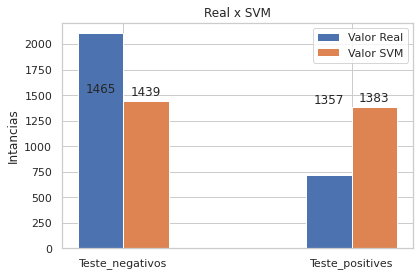

In [ ]:
#Criando labels e os valores armazenados nas barras
labels = ['Teste_negativos', 'Teste_positives']
count_test = [(pred == 0).sum(), (pred == 1).sum()]
count_baseline = [(baseline_pred == 0).sum(), (baseline_pred == 1).sum()]

#Criando as barras
b1 = np.arange(len(labels))
width = 0.2 #largura da barra

#Criando os plots
fig, ax = plt.subplots()
bar3 = ax.bar(b1 - width/2, count_test, width, label='Valor Real')
bar4 = ax.bar(b1 + width/2, count_baseline, width, label='Valor SVM')

#dando nome ao gráfico 
ax.set_ylabel('Intancias')
ax.set_title('Real x SVM')
ax.set_xticks(b1)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
          xy=(rect.get_x() + rect.get_width() /2, height),
          xytext=(0,3),
          textcoords='offset points',
          ha='center', va='bottom')
      
#Plotando o grafico de barras
autolabel(bar1)
autolabel(bar2)
fig.tight_layout()

plt.show()

In [ ]:
#Prevendoa probabilidade de em percentual de cada registro
pred = clasificador_svm.predict_proba(x_teste)
pred

array([[0.61832258, 0.38167742],
       [0.99126131, 0.00873869],
       [0.66941238, 0.33058762],
       ...,
       [0.57651073, 0.42348927],
       [0.98534957, 0.01465043],
       [0.57651073, 0.42348927]])

In [ ]:
# Atribuindo os valores as variáveis para plotar o gráfico da Curva ROC
fp, tp, thresholds = roc_curve(y_teste, pred[:, 1])

Text(0.5, 1.0, 'Curva ROC')

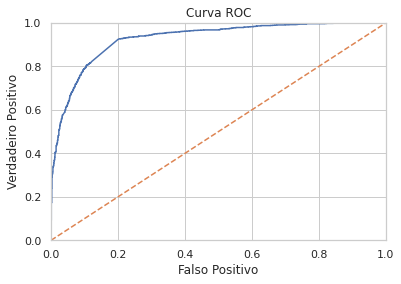

In [ ]:
# Gerando a Curva ROC
plt.plot(fp, tp)

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')

In [ ]:
# Área sob a curva ROC
auc(fp, tp)

0.9269380610209733

In [ ]:
resultado = np.where(pred >= 0.551, 1, 0).astype(int).reshape(-1)
resultado

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
# treinando o modelo 
classifier = RandomForestClassifier(n_estimators= 10, random_state=42).fit(X_train, Y_train);

In [ ]:
# aplicando o modelo treinado para a previsão do resultado do teste
predictions3_labels = classifier.predict(x_teste)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': y_teste, 'Previsto': predictions3_labels})  
p.head(10)

,Real,Previsto
3481,0,0
8481,0,0
6320,1,1
4453,1,1
6646,0,0
8376,0,0
6487,0,0
9318,0,0
4898,1,1
6292,0,0


In [ ]:
#avaliando o modelo
print('Matriz de Confusão\n', metrics.confusion_matrix(y_teste, predictions3_labels)) 
print('\nAcurácia\n', metrics.accuracy_score(y_teste, predictions3_labels)) 
print('\nAcurácia Balanceada por classe\n', metrics.balanced_accuracy_score(y_teste, predictions3_labels)) 
print('\nPrecision\n', metrics.precision_score(y_teste, predictions3_labels)) 
print('\nRecall\n', metrics.recall_score(y_teste, predictions3_labels)) 
print('\nF1\n', metrics.f1_score(y_teste, predictions3_labels)) 
print('\nAUCROC\n', metrics.roc_auc_score(y_teste, predictions3_labels))
print('\nClassification Report\n', metrics.classification_report(y_teste, predictions3_labels)) 

Matriz de Confusão
 [[1413   52]
 [  64 1293]]

Acurácia
 0.9588944011339475

Acurácia Balanceada por classe
 0.9586711301027915

Precision
 0.9613382899628253

Recall
 0.952837140751658

F1
 0.9570688378978535

AUCROC
 0.9586711301027915

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1465
           1       0.96      0.95      0.96      1357

    accuracy                           0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822



Text(0.5, 12.5, 'Predicted label')

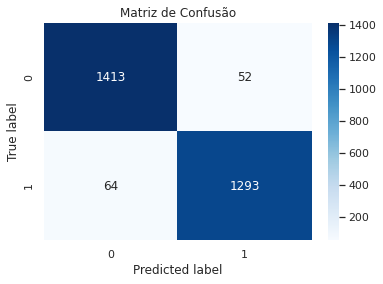

In [ ]:
#Gerando matriz de confusão do modelo RandomForestClassifier com o Seaborn para melhor visualização e entendimento
cm = confusion_matrix(y_teste, predictions3_labels)

sab.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusão')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#Verificando o score do modelo de arvore de decisão para detectar Overfitting
classifier.score(x_teste, y_teste)

0.9588944011339475

In [ ]:
classifier.score(X_train, Y_train)

0.9956040839478162

In [ ]:
classifier.feature_importances_

array([0.01664119, 0.03004552, 0.01134617, 0.02058229, 0.37895938,
       0.01685016, 0.03653858, 0.11110357, 0.0038185 , 0.15426445,
       0.14273037, 0.05266155, 0.01954661, 0.00491165])

Text(0.5, 1.0, 'Importância de cada feature')

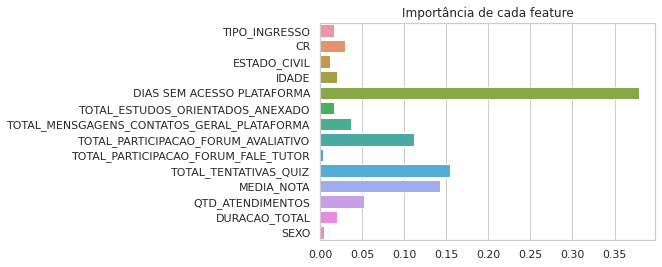

In [ ]:
#Verificando a importância de cada Feature no modelo
importances = pd.Series(data=classifier.feature_importances_,index=x.columns)
sab.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [ ]:
#Aplicando modelo KNN
classify_knn = KNeighborsClassifier().fit(X_train, Y_train);
classify_knn.fit(X_train, Y_train)
#result_knn = classify_knn.predict(B_train)
predict_knn = classify_knn.predict(x_teste)
predict_knn_proba = classify_knn.predict_proba(x_teste)
r_score_knn = accuracy_score(y_teste,predict_knn)
w_score_knn = 1 - r_score_knn
print("KNN Performance\n\n",classification_report(y_teste,predict_knn))
print("\nError\n\n",w_score_knn) #erro é confrontado com a acurácia

KNN Performance

               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1465
           1       0.85      0.86      0.86      1357

    accuracy                           0.86      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.86      0.86      0.86      2822


Error

 0.13961729270021261


Text(0.5, 12.5, 'Predicted label')

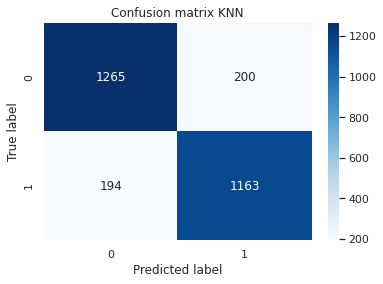

In [ ]:
confusionmtx_knn = confusion_matrix(y_teste,predict_knn) 
sab.heatmap(confusionmtx_knn, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix KNN')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Área da curva: 0.9266465627601541

Representação da curva ROC


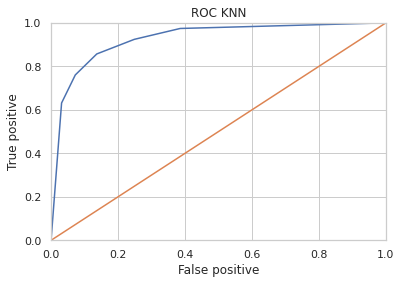

In [ ]:
fknn,tknn,thresholdsknn= roc_curve(y_teste,predict_knn_proba[:,1])
plt.plot(fknn,tknn)
plt.plot([0,1],[0,1],'-')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.title('ROC KNN')
print('Área da curva:',auc(fknn,tknn))
print('\nRepresentação da curva ROC')

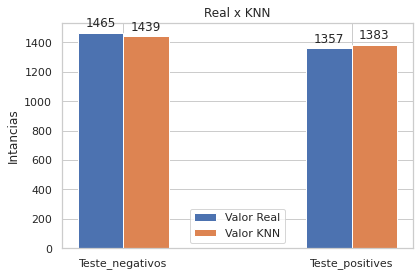

In [ ]:
#Criando labels e os valores armazenados nas barras
labels = ['Teste_negativos', 'Teste_positives']
count_test = [(predict_knn == 0).sum(), (predict_knn == 1).sum()]
count_baseline = [(baseline_pred == 0).sum(), (baseline_pred == 1).sum()]

#Criando as barras
b2 = np.arange(len(labels))
width = 0.2 #largura da barra

#Criando os plots
fig, ax = plt.subplots()
bar5 = ax.bar(b1 - width/2, count_test, width, label='Valor Real')
bar6 = ax.bar(b1 + width/2, count_baseline, width, label='Valor KNN')

#dando nome ao gráfico 
ax.set_ylabel('Intancias')
ax.set_title('Real x KNN')
ax.set_xticks(b1)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
          xy=(rect.get_x() + rect.get_width() /2, height),
          xytext=(0,3),
          textcoords='offset points',
          ha='center', va='bottom')
      
#Plotando o grafico de barras
autolabel(bar1)
autolabel(bar2)
fig.tight_layout()

plt.show()

#GERANDO A PROBABILIDADE PARA OS ALUNOS INDIVIDUALMENTE DA BASE ORIGINAL

In [ ]:
validador = md
validador.head()

,ID_ALUNO,ID_CURSO,CURSO,ULTIMO_SEMESTRE,PRIMEIRO_SEMESTRE,TIPO_INGRESSO,CODIGO,CR,ESTADO_CIVIL,SITUACAO_PERLET,IDADE,SEXO,DIAS SEM ACESSO PLATAFORMA,TOTAL_ESTUDOS_ORIENTADOS_ANEXADO,TOTAL_MENSGAGENS_CONTATOS_GERAL_PLATAFORMA,TOTAL_PARTICIPACAO_FORUM_AVALIATIVO,TOTAL_PARTICIPACAO_FORUM_FALE_TUTOR,TOTAL_TENTATIVAS_QUIZ,CH,MEDIA_NOTA,QTD_ATENDIMENTOS,DURACAO_TOTAL
0,810066,370,Serviço Social,2020/2,2018/1,0,27225,9.29,0,0,35,0,10,2,0,3,0,8,420,8.000000,7,447
1,810679,458,Logística,2020/2,2019/1,1,27183,5.39,0,0,32,0,14,0,0,3,0,13,380,7.398438,4,109
2,813167,848,Pedagogia,2020/2,2020/2,2,27095,0.00,1,0,27,0,3,2,3,2,1,17,340,9.250000,0,0
3,813755,462,Serviço Social,2019/2,2019/1,0,27202,3.30,1,1,34,0,0,0,0,0,0,0,0,7.144531,0,0
4,820007,379,Letras,2020/1,2020/1,0,26955,0.00,1,1,30,0,0,0,0,0,0,0,0,7.144531,1,0


In [ ]:
validador.columns

Index(['ID_ALUNO', 'ID_CURSO', 'CURSO', 'ULTIMO_SEMESTRE', 'PRIMEIRO_SEMESTRE',
       'TIPO_INGRESSO', 'CODIGO', 'CR', 'ESTADO_CIVIL', 'SITUACAO_PERLET',
       'IDADE', 'SEXO', 'DIAS SEM ACESSO PLATAFORMA',
       'TOTAL_ESTUDOS_ORIENTADOS_ANEXADO',
       'TOTAL_MENSGAGENS_CONTATOS_GERAL_PLATAFORMA',
       'TOTAL_PARTICIPACAO_FORUM_AVALIATIVO',
       'TOTAL_PARTICIPACAO_FORUM_FALE_TUTOR', 'TOTAL_TENTATIVAS_QUIZ', 'CH',
       'MEDIA_NOTA', 'QTD_ATENDIMENTOS', 'DURACAO_TOTAL'],
      dtype='object')

In [ ]:
x.columns

Index(['TIPO_INGRESSO', 'CR', 'ESTADO_CIVIL', 'IDADE',
       'DIAS SEM ACESSO PLATAFORMA', 'TOTAL_ESTUDOS_ORIENTADOS_ANEXADO',
       'TOTAL_MENSGAGENS_CONTATOS_GERAL_PLATAFORMA',
       'TOTAL_PARTICIPACAO_FORUM_AVALIATIVO',
       'TOTAL_PARTICIPACAO_FORUM_FALE_TUTOR', 'TOTAL_TENTATIVAS_QUIZ',
       'MEDIA_NOTA', 'QTD_ATENDIMENTOS', 'DURACAO_TOTAL', 'SEXO'],
      dtype='object')

In [ ]:
# Descartar colunas textuais e identificador
identificador = validador[['ID_ALUNO','ID_CURSO']]
validador.drop(['CURSO','ULTIMO_SEMESTRE','PRIMEIRO_SEMESTRE','CODIGO','SITUACAO_PERLET','ID_ALUNO','ID_CURSO','CH'], axis=1, inplace=True)

# Imputar valores nulos usando padrões do conjunto de treino
#validation.loc[validation['Age'].isnull(), 'Age'] = 29.97

In [ ]:
pred = clasificador_svm.predict_proba(validador)
pred = pred[:, 0]

In [ ]:
resultado = pd.concat([identificador, pd.DataFrame(pred, columns=['PROBABILIDADE'])], axis=1)
resultado.head(50)

,ID_ALUNO,ID_CURSO,PROBABILIDADE
0,810066,370,0.576511
1,810679,458,0.576511
2,813167,848,0.576315
3,813755,462,0.556137
4,820007,379,0.609090
5,830152,688,0.576511
6,850285,375,0.576511
7,1010883,370,0.576511
8,1011200,376,0.576511
9,1011209,450,0.576511


Convertendos as variáveis numéricas para categóricas

In [ ]:
class_TIPOINGRESSO = {
     0 : 'Novo Curso Superior',
     1 : 'Processo Seletivo',
     2 : 'Histórico',
     3 : 'Transferência' ,
     4 : 'Reingresso' ,
     5 : 'ENEM' ,
     6 : 'Prouni' ,
     7 : 'Aluno Especial' ,
     8 : 'Encceja' ,
     9 : 'Não informado' ,
     10: 'Reabertura de Matrícula' ,
     11: 'Nossa Bolsa' 
}
class_ESTADOCIVIL = {
    0 : 'Casado' ,
    1 : 'Solteiro' ,
    2 : 'Divorciado' ,
    3 : 'Não informado' ,
    4 : 'Desquitado' ,
    5 : 'Outros' ,
    6 : 'União Estável' ,
    7 : 'Separado' ,
    8 : 'Viúvo'  
}
class_SEXO = {
    0 : 'M' ,
    1 : 'F' 
}
class_STATUS = {
    0 : 'Matriculado',
    1 : 'Evadido'
}
md_copy['TIPO_MATRICULA'] = md_copy['TIPO_INGRESSO'].map(class_TIPOINGRESSO)
md_copy['ESTADO_CIVIL'] = md_copy['ESTADO_CIVIL'].map(class_ESTADOCIVIL)
md_copy['SEXO'] = md_copy['SEXO'].map(class_SEXO)
md_copy['SITUACAO_PERLET'] = md_copy['SITUACAO_PERLET'].map(class_STATUS)
md_copy.drop(columns='ESTADO_CIVIL',inplace=True)
md_copy.drop(columns='TIPO_INGRESSO',inplace=True)
final_md = pd.merge(md_copy,resultado,how='left',on=['ID_ALUNO','ID_CURSO'])
final_md = final_md[final_md['SITUACAO_PERLET']=='Matriculado']

Visualizando a probabilidade gerada por aluno

In [ ]:
final_md.head()

,ID_ALUNO,ID_CURSO,CURSO,ULTIMO_SEMESTRE,PRIMEIRO_SEMESTRE,CODIGO,CR,SITUACAO_PERLET,IDADE,SEXO,DIAS SEM ACESSO PLATAFORMA,TOTAL_ESTUDOS_ORIENTADOS_ANEXADO,TOTAL_MENSGAGENS_CONTATOS_GERAL_PLATAFORMA,TOTAL_PARTICIPACAO_FORUM_AVALIATIVO,TOTAL_PARTICIPACAO_FORUM_FALE_TUTOR,TOTAL_TENTATIVAS_QUIZ,CH,MEDIA_NOTA,QTD_ATENDIMENTOS,DURACAO_TOTAL,TIPO_MATRICULA,PROBABILIDADE
0,810066,370,Serviço Social,2020/2,2018/1,27225,9.29,Matriculado,35,M,10,2,0,3,0,8,420,8.000000,7,447,Novo Curso Superior,0.576511
1,810679,458,Logística,2020/2,2019/1,27183,5.39,Matriculado,32,M,14,0,0,3,0,13,380,7.398438,4,109,Processo Seletivo,0.576511
2,813167,848,Pedagogia,2020/2,2020/2,27095,0.00,Matriculado,27,M,3,2,3,2,1,17,340,9.250000,0,0,Histórico,0.576315
5,830152,688,Gestão de Recursos Humanos,2020/2,2020/2,27177,0.00,Matriculado,45,M,6,1,0,1,0,11,860,8.210938,3,7570,Novo Curso Superior,0.576511
7,1010883,370,Serviço Social,2020/2,2018/1,13682,7.52,Matriculado,48,M,7,2,0,0,0,8,420,6.398438,6,354,Processo Seletivo,0.576511


importando os resultados para uma planilha do EXCEL

In [ ]:
#Gerando output com os registros previstos de toda a base
#final_md.to_excel('/content/gdrive/MyDrive/TCC/output.xlsx')